# Regression

These codes have been updated to work with Tensorflow 2.0. It will not work with previous versions.


Adapted from `Chollet's Deep Learning with Python`

## Setting up

In [0]:
import numpy as np

try:
  # %tensorflow_version only existis in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf 
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
#boston_housing.load_data?

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(404, 13)

In [0]:
x_test.shape

(102, 13)

In [0]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

## Data Preparation

In [0]:
mean = x_train.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [0]:
x_train -= mean

In [0]:
std = x_train.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [0]:
x_train /= std

In [0]:
x_test -= mean

In [0]:
x_test /= std

In [0]:
x_train.shape

(404, 13)

## Network Architecture

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(64, 
                       activation='relu',
                       input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(64, 
                       activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
_________________________________________________________________


What are activation functions?

`relu`: non-linear. So the NN model can learn non-linear features

Else it will be purely linear (affine) in nature

## Loss Function and Optimisers

In [0]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

## Measure the Performance of the NN

Let's use some of the training data for validation

In [0]:
x_val = x_train[:x_train.shape[0]//4]
x_train_1 = x_train[x_train.shape[0]//4:]

In [0]:
y_val = y_train[:x_train.shape[0]//4]
y_train_1 = y_train[x_train.shape[0]//4:]

In [0]:
x_train_1.shape

(303, 13)

In [0]:
y_train_1.shape

(303,)

In [0]:
x_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [0]:
history = model.fit(x_train_1,
                    y_train_1,
                    epochs=100,
                    batch_size=1,
                    validation_data=(x_val, y_val))

Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 4s 12ms/sample - loss: 100.7181 - mae: 6.6747 - val_loss: 23.5464 - val_mae: 3.3131
Epoch 2/100
303/303 [==============================] - 2s 5ms/sample - loss: 22.1260 - mae: 3.2642 - val_loss: 14.1768 - val_mae: 2.2501
Epoch 3/100
303/303 [==============================] - 2s 5ms/sample - loss: 18.0195 - mae: 2.9758 - val_loss: 15.4518 - val_mae: 2.9372
Epoch 4/100
303/303 [==============================] - 2s 5ms/sample - loss: 15.8463 - mae: 2.8014 - val_loss: 13.5269 - val_mae: 2.2891
Epoch 5/100
303/303 [==============================] - 2s 5ms/sample - loss: 15.3548 - mae: 2.7461 - val_loss: 17.0609 - val_mae: 2.8179
Epoch 6/100
303/303 [==============================] - 2s 5ms/sample - loss: 15.6477 - mae: 2.5646 - val_loss: 12.5626 - val_mae: 2.6299
Epoch 7/100
303/303 [==============================] - 2s 5ms/sample - loss: 13.2854 - mae: 2.4473 - val_loss: 12.3814 - val_mae: 

In [0]:
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

## Visualisation Performance

In [0]:
import matplotlib.pyplot as plt

In [0]:
epochs = range(1, len(history_dict['mae']) + 1)

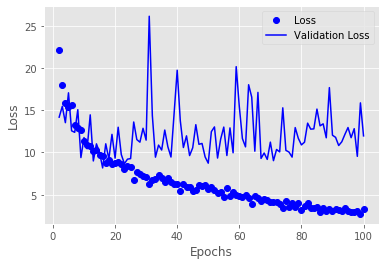

In [0]:
plt.style.use('ggplot')
plt.plot(epochs[1:], history_dict['loss'][1:], 'bo', 
         label='Loss')
plt.plot(epochs[1:], history_dict['val_loss'][1:], 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

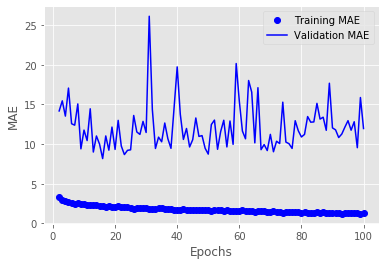

In [0]:
plt.clf()
mae_values = history_dict['mae']
val_mae_values = history_dict['val_loss']

plt.plot(epochs[1:], mae_values[1:], 'bo', 
         label='Training MAE')
plt.plot(epochs[1:], val_mae_values[1:], 'b',
         label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend();

In [0]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
test_mae_score

2.5660949

***